## 迭代器

在讨论迭代器和生成器之前，我们不妨了解一下可迭代对象这个概念：

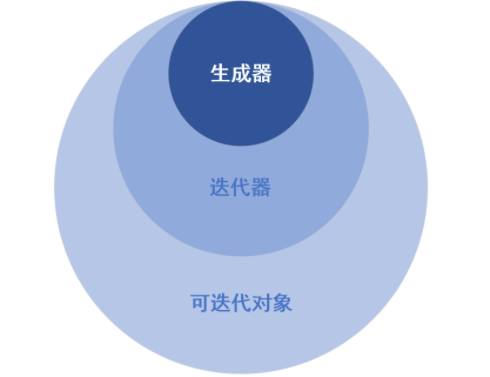

可迭代对象是能够一次返回其中一个成员的对象，常见的有：字符串，列表，元祖，集合还有字典。

简单的来讲，如果一个对象可以使用for循环来进行遍历，那么这个对象可以被视作是一个可迭代对象。

我们可以使用

```python
isinstance()

```

函数来判断对象是否是可迭代对象：

In [66]:
# 从collections模块导入iterable对比对象
from collections import Iterable

In [67]:
# 判断一下字符串是否是可迭代对象

isinstance("string", Iterable)

True

In [68]:
# 判断一下列表是否是可第迭代对象

isinstance(['qw', 'wer'], Iterable)

True

In [69]:
# 判断字典是否是可迭代对象

isinstance({"idNumber":"123654"}, Iterable)

True

In [70]:
# 集合是否是课迭代对象

isinstance({1, 2}, Iterable)

True

In [71]:
# 数字是否是可迭代对象

isinstance(18, Iterable)

False

迭代器是访问集合元素的一种方式。迭代器是一个可以记住遍历的位置的对象。

迭代器对象从集合的第一个元素开始访问，直到所有的元素被访问完结束。迭代器只能往前不会后退。

迭代器有两个基本的方法：

1. iter()
2. next()

我们来使用一下这两个方法：

In [72]:
listOne = [1, 2, 3, 4]  # 生成一个列表
iterObject = iter(listOne)  # 创建迭代器对象

In [73]:
print(next(iterObject))  # 输出迭代器的下一个元素

1


In [74]:
print(next(iterObject))  # 输出迭代器的下一个元素

2


我们可以发现，next()函数会输出下一个元素，并且在输出之后将下一个元素标记为当前元素，如此如果我们再次使用next()函数，就会输入原先的元素的下下个元素。

迭代器对象也可以使用for语句来进行遍历：

In [75]:
listTwo = [1, 2, 3, 4, 5, 6, 7, 8, 9]
it = iter(listTwo)

for num in it:
    print(num, end = " ")

1 2 3 4 5 6 7 8 9 

或者我们也可以使用next()函数配合while函数来实现循环：

In [76]:
import sys  # 引入sys模块

listThree = [1, 2, 3, 4, 5, 6]
nextIter = iter(listThree)

while True:
    try:
        print (next(nextIter))
    except StopIteration:
        sys.exit()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



1
2
3
4
5
6
Traceback (most recent call last):
  File "C:\Users\yinia\AppData\Local\Temp\ipykernel_2952\3795979630.py", line 8, in <module>
    print (next(nextIter))
StopIteration

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\yinia\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py", line 3524, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\yinia\AppData\Local\Temp\ipykernel_2952\3795979630.py", line 10, in <module>
    sys.exit()
SystemExit

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\yinia\appdata\local\programs\python\python37\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "c:\users\yinia\appdata\local\programs\python\python37\lib\site-packages\IPython\

TypeError: object of type 'NoneType' has no len()

## 创建一个迭代器

把一个类作为一个迭代器使用需要在类中实现两个方法：

1. __iter__()
2. __next__()

在面向对象编程中，类都有一个构造函数，Python的构造函数为__init__()，它会在对象初始化的时候执行。

__iter__()方法则会返回一个特殊的迭代器对象，这个迭代器对象实现了 __next__() 方法并通过 StopIteration 异常标识迭代的完成。

__next__()方法则会返回下一个迭代器对象。

In [77]:
class MyNumbers:
    
    # 创建一个返回数字的迭代器
    def __iter__(self):
        self.a = 1
        return self
    
    # 逐步增加1
    def __next__(self):
        x = self.a
        self.a += 1
        return x

myclass = MyNumbers()
myiter = iter(myclass)

print(next(myiter))
print(next(myiter))
print(next(myiter))
print(next(myiter))
print(next(myiter))

1
2
3
4
5


## StopIteration

StopIteration异常用于标识迭代的完成，防止出现无限循环的情况，在__next__()方法中，我们可以设置在完成指定循环次数之后出发StopIteration异常来结束迭代

In [78]:
class MyNumbers:
    
    def __iter__(self):
        self.a = 1
        return self
    
    def __next__(self):
        if self.a <= 20:
            x = self.a
            self.a += 1
            return x
        else:
            # raise关键字可以用来抛出异常
            raise StopIteration

myclass = MyNumbers()
myiter = iter(myclass)

for x in myiter:
    print(x)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [79]:
# raise关键字用来抛出异常

x = "hello"

if not type(x) is int:
    raise TypeError("Only integers are allowed")

TypeError: Only integers are allowed

## 生成器

在Python语言中，使用了yield的函数被称为生成器（generator）。

跟普通的函数不同而的地方在于，生成器是一个返回迭代器的函数，只能够用语迭代操作，或者我们可以将生成器理解为是一个迭代器。

在调用生成器的过程中，每次遇到yield的时候，函数会保存当前所有的运行信息，并且返回yield的值，并在下一次执行 next() 方法时从当前位置继续运行。

调用一个生成器函数，返回的是一个迭代器对象。

In [80]:
import sys
 
def fibonacci(n): # 生成器函数 - 斐波那契
    a, b, counter = 0, 1, 0
    while True:
        if (counter > n): 
            return
        yield a
        a, b = b, a + b
        counter += 1
f = fibonacci(10) # f 是一个迭代器，由生成器返回生成
 
while True:
    try:
        print (next(f), end=" ")
    except StopIteration:
        sys.exit()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



0 1 1 2 3 5 8 13 21 34 55 Traceback (most recent call last):
  File "C:\Users\yinia\AppData\Local\Temp\ipykernel_2952\846189007.py", line 15, in <module>
    print (next(f), end=" ")
StopIteration

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\yinia\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py", line 3524, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\yinia\AppData\Local\Temp\ipykernel_2952\846189007.py", line 17, in <module>
    sys.exit()
SystemExit

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\yinia\appdata\local\programs\python\python37\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "c:\users\yinia\appdata\local\programs\python\python37\lib\site-pa

TypeError: object of type 'NoneType' has no len()

## map函数

map() 会根据提供的函数对指定序列做映射。

map()的语法结构为：

```python
map(function, iterable, ...)
```

函数有两个参数：

1. function：被调用的函数
2. iterable：一个或者多个序列

在Python3种，map()函数会返回迭代器。

In [81]:
# 一个用来计算平方数的函数
def square(x):
    return x**2

In [82]:
# 计算列表各个元素的平方
map(square, [1,2,3,4,5])  # 返回值是一个迭代器 

In [83]:
# 将迭代器转换为列表
list(map(square, [1, 2, 3, 4, 5]))

[1, 4, 9, 16, 25]

In [84]:
# 或者我们可以使用lambda匿名函数

list(map(lambda x: x**2, [1, 2, 3, 4, 5]))

[1, 4, 9, 16, 25]